<font color="green">

# Lab 4
#### Aitor Elfau 49092725
#### Palmer Nelson 47066829
#### Abdul Wasay 

</font>

## Load, Split, and Balance (1.5 points total) 
[.5 points] 
 - (1) Load the data into memory and save it to a pandas data frame. Do not normalize or one-hot encode any of the features until asked to do so later in the rubric. 
 - (2) Remove any observations that having missing data. 
 - (3) Encode any string data as integers for now. 
 - (4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable. 

[.5 points] Balance the dataset so that about the same number of instances are within each class. Choose a method for balancing the dataset and explain your reasoning for selecting this method. One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. Should balancing of the dataset be done for both the training and testing set? Explain.

[.5 points] Assume you are equally interested in the classification performance for each class in the dataset. Split the dataset into 80% for training and 20% for testing. There is no need to split the data multiple times for this lab.

Note: You will need to one hot encode the target, but do not one hot encode the categorical data until instructed to do so in the lab. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#loading csv into dataframe and looking at the data
df = pd.read_csv("acs2017_census_tract_data.csv")

print (df.head())
print('===========')
print(df.dtypes)
print('===========')
print(df.info())
print('===========')
df.describe()

      TractId    State          County  TotalPop   Men  Women  Hispanic  \
0  1001020100  Alabama  Autauga County      1845   899    946       2.4   
1  1001020200  Alabama  Autauga County      2172  1167   1005       1.1   
2  1001020300  Alabama  Autauga County      3385  1533   1852       8.0   
3  1001020400  Alabama  Autauga County      4267  2001   2266       9.6   
4  1001020500  Alabama  Autauga County      9965  5054   4911       0.9   

   White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  \
0   86.3    5.2     0.0  ...   0.5          0.0         2.1         24.5   
1   41.6   54.5     0.0  ...   0.0          0.5         0.0         22.2   
2   61.4   26.5     0.6  ...   1.0          0.8         1.5         23.1   
3   80.3    7.1     0.5  ...   1.5          2.9         2.1         25.9   
4   77.5   16.4     0.0  ...   0.8          0.3         0.7         21.0   

   Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  Unemployment  
0       881  

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,7.400100e+04,74001.000000,74001.000000,74001.000000,73305.000000,73305.000000,73305.00000,73305.000000,73305.000000,73305.000000,...,73200.000000,73200.000000,73200.000000,73055.000000,74001.000000,73190.000000,73190.000000,73190.000000,73190.000000,73191.000000
mean,2.839113e+10,4384.716017,2157.710707,2227.005311,17.265444,61.309043,13.28910,0.734047,4.753691,0.147341,...,3.042825,1.894605,4.661466,26.056594,2049.152052,79.494222,14.163342,6.171484,0.171164,7.246738
std,1.647593e+10,2228.936729,1120.560504,1146.240218,23.073811,30.634461,21.60118,4.554247,8.999888,1.029250,...,5.805753,2.549374,4.014940,7.124524,1138.865457,8.126383,7.328680,3.932364,0.456580,5.227624
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.303901e+10,2903.000000,1416.000000,1465.000000,2.600000,38.000000,0.80000,0.000000,0.200000,0.000000,...,0.400000,0.400000,2.000000,21.100000,1276.000000,75.200000,9.300000,3.500000,0.000000,3.900000
50%,2.804700e+10,4105.000000,2007.000000,2082.000000,7.400000,70.400000,3.80000,0.000000,1.500000,0.000000,...,1.400000,1.200000,3.800000,25.400000,1895.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,4.200341e+10,5506.000000,2707.000000,2803.000000,21.100000,87.700000,14.60000,0.400000,5.000000,0.000000,...,3.300000,2.500000,6.300000,30.300000,2635.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,7.215375e+10,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.00000,100.000000,100.000000,71.900000,...,100.000000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


In [2]:
# dropping rows with NA values

df_cleaned = df.dropna()
print(df_cleaned.info())

#encode the state variable
from sklearn.preprocessing import LabelEncoder
state_encoder = LabelEncoder()
df_cleaned['State'] = state_encoder.fit_transform(df_cleaned['State'])


print(len(df['State'].unique()))
# removing Tract ID because its unique for ech row and useless for our application
# Removing County because its esseintially doing the same as state and we do not need it (52 unique values)
df_cleaned.drop(columns=['TractId', 'County'], inplace=True)

print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float64
 17

C:\Users\Wasay\AppData\Local\Temp\ipykernel_103684\887455173.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['State'] = state_encoder.fit_transform(df_cleaned['State'])
C:\Users\Wasay\AppData\Local\Temp\ipykernel_103684\887455173.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['TractId', 'County'], inplace=True)


Removed Tract ID because its unique for ech row and useless for our application

Removed County because its esseintially doing the same as state and we do not need it (52 unique values)

We should apply any balancing technique only on the training dataset, as keep the testing dataset as is. This is so that we avoid data being repeated within training and test sets that can be caused by balancing. Doing this also keeps test data closer to what the real world data used after training will look like, hence testing accuracy against test data should reflect real world accuracy levels.  


Since child_poverty is % of children under poverty level, we can divide it up into 4 quartiles. But that wont be a meaningful divide. Instead we can use something based on :

 - 3 Very High Child Poverty: Above 85% (Higher than the threshold for reduced school lunch program)
 - 2 High Child Poverty: 50% - 85% (Between Medicaid and reduced lunch thresholds)
 - 1 Moderate Child Poverty: 25% - 49% (general middle category for areas with moderate levels)
 - 0 Low Child Poverty: 0% - 24% (Areas with relatively low child poverty)

In [3]:
from sklearn.model_selection import train_test_split

# Define the bins
# BEWARE IT IS NOT INCLUSIVE ON BOTH ENDS, YOU CAN CHOOSE WHICH, BUT NOT BOTH
# EITHER DO RIGHT FALSE TO 101, OR DO RIGHT TRUE STARTING AT -1
# TO AVOID THE NEGATIVE NUMBER RISK I FEEL RIGHT FALSE TO 101 IS BETTER
bins = [0.0, 25.0, 50.0, 85.0, 100.1]

# Define the labels for the bins
#labels = ['Low Child Poverty', 'Moderate Child Poverty', 'High Child Poverty', 'Very High Child Poverty']
labels = [0, 1, 2, 3]

# Modify binning to make bins right-exclusive
df_binned = df_cleaned.copy()
df_binned['ChildPoverty_class'] = pd.cut(df_binned['ChildPoverty'], bins=bins, labels=labels, right=False)

# Check if there are any 100.0 values in 'ChildPoverty'
#print((df_binned['ChildPoverty'] == 100.0).sum())

# drop is only a subselection
X = df_binned.drop(['ChildPoverty_class'], axis=1)
y = df_binned['ChildPoverty_class']

# Splitting the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=42)

# print(df_binned['ChildPoverty'].min(), df_binned['ChildPoverty'].max())

In [4]:
print(train_y.value_counts())

ChildPoverty_class
0    38167
1    14783
2     4998
3      226
Name: count, dtype: int64


In [5]:
recombined_train = pd.concat([train_X, train_y], axis=1)

# Separate the different classes
low_poverty       = recombined_train[recombined_train['ChildPoverty_class'] == 0] # 'Low Child Poverty']
moderate_poverty  = recombined_train[recombined_train['ChildPoverty_class'] == 1] # 'Moderate Child Poverty']
high_poverty      = recombined_train[recombined_train['ChildPoverty_class'] == 2] # 'High Child Poverty']
very_high_poverty = recombined_train[recombined_train['ChildPoverty_class'] == 3] # 'Very High Child Poverty']

# Over-sample the minority classes
num_samples                 = len(moderate_poverty)
high_poverty_resampled      = high_poverty.sample(num_samples, replace=True, random_state=42)
very_high_poverty_resampled = very_high_poverty.sample(num_samples, replace=True, random_state=42)

# Under-sample the majority class
low_poverty_resampled       = low_poverty.sample(num_samples, random_state=42)

# Combine the resampled datasets
balanced_train_df           = pd.concat([low_poverty_resampled, moderate_poverty, high_poverty_resampled, very_high_poverty_resampled])

# Shuffle the dataset
balanced_train_df           = balanced_train_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the distribution
print(balanced_train_df['ChildPoverty_class'].value_counts())

ChildPoverty_class
0    14783
1    14783
2    14783
3    14783
Name: count, dtype: int64


There is a large disparity in classes, hence oversampling and undersampling individually may not be appropriate. 
Undersampling will reduce our data size to 225 and we lose a lot of information. Oversampling will overfit the smaller class. 

We could however use a combination of oversampling and undersampling on the training data. This way we can reduce the problems of using them individually. 

We will choose moderate child poverty as the number to oversample and undersample because its a good middle ground in order to get a balanced dataset. 

In [6]:
train_X = balanced_train_df.drop(['ChildPoverty_class'], axis=1)
train_y = balanced_train_df['ChildPoverty_class']

print(train_y.value_counts())

ChildPoverty_class
0    14783
1    14783
2    14783
3    14783
Name: count, dtype: int64


## Pre-processing and Initial Modeling (2.5 points total)
You will be using a two layer perceptron from class for the next few parts of the rubric. There are several versions of the two layer perceptron covered in class, with example code. When selecting an example two layer network from class be sure that you use: (1) vectorized gradient computation, (2) mini-batching, (3) cross entropy loss, and (4) proper Glorot initialization, at a minimum. There is no need to use momentum or learning rate reduction (assuming you choose a sufficiently small learning rate). It is recommended to use sigmoids throughout the network, but not required.

In [12]:
#Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
#Original Author: Sebastian Raschka

import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
# Start with the following functions:
#    init
#    encode_labels
#    initialize weights
#    sigmoid
#    add bias (vector of ones)
#    objective function (cost and regularizer)
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

#     def _initialize_weights(self):
#         """Initialize weights with small random numbers."""
#         W1_num_elems = (self.n_features_)*self.n_hidden
#         W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
#         W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
#         b1 = np.zeros((self.n_hidden, 1))
        
#         W2_num_elems = (self.n_hidden)*self.n_output_
#         W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
#         W2 = W2.reshape(self.n_output_, self.n_hidden)
#         b2 = np.zeros((self.n_output_, 1))
        
#         return W1, W2, b1, b2
    
    def _initialize_weights(self):
        """Initialize weights with Glorot Initialization."""
        init_bound = np.sqrt(6. / (self.n_features_ + self.n_hidden))
        W1 = np.random.uniform(-init_bound, init_bound, (self.n_hidden, self.n_features_))
        b1 = np.zeros((self.n_hidden, 1))

        init_bound = np.sqrt(6. / (self.n_hidden + self.n_output_))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden))
        b2 = np.zeros((self.n_output_, 1))

        return W1, W2, b1, b2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_) * np.sqrt(np.mean(W1 ** 2) + np.mean(W2 ** 2))
    
#     def _cost(self,A3,Y_enc,W1,W2):
#         '''Get the objective function value'''
#         cost = np.mean((Y_enc-A3)**2)
#         L2_term = self._L2_reg(self.l2_C, W1, W2)
#         return cost + L2_term

# Cross entropy used to calculate the cost instead of mean squared error
    def _cost(self, A3, Y_enc, W1, W2):
        '''Get the objective function value for binary classification'''
        Y_enc = Y_enc.astype(int)
        term1 = -Y_enc * np.log(A3 + 1e-5)  # Adding a small value to avoid log(0)
        term2 = (1. - Y_enc) * np.log(1. - A3 + 1e-5)
        cost = np.sum(term1 - term2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term


class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # need to vectorize this computation!
        # See additional code and derivation below!
        pass
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2, self.b1, self.b2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * gradW1
            self.W2 -= self.eta * gradW2
            self.b1 -= self.eta * gradb1
            self.b2 -= self.eta * gradb2
            

        return self
    
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C * 2
        gradW2 += W2 * self.l2_C * 2 

        return gradW1, gradW2, gradb1, gradb2

# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka
# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
class TLPVectorizedMiniBatch(TwoLayerPerceptronVectorized):
    def __init__(self, alpha=0.1, decrease_const=0.0, shuffle=True, minibatches=1, **kwds):        
        # but keep other keywords
        super().__init__(**kwds)
        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches
        
        
    def fit(self, X, y, print_progress=0):
        """ Learn weights from training data."""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()
        
        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum

        self.cost_ = []
        
        # outer loop: go through all data one time (epochs)
        for k in range(self.epochs):

            # adaptive learning rate
            eta = self.eta**(1+self.decrease_const*k)# decreasing learning rate
            eta = max(eta,self.eta/1000)
            # there are many forms of adaptive learning rates out there!

            if print_progress>0 and (k+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (k+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                # shuffle the data so batches ar different
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            # use numpy split to split into equal sized batches 
            # num batches == self.minibatches
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            # inner loop: go through all mini-batches of data
            for idx in mini: # iterate through each batch

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.b1,
                                                       self.b2
                                                      )
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2,
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1, W2=self.W2)

                # now use simple momentum to update values
                rho_W1, rho_W2 = eta * gradW1, eta * gradW2 
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2
                
                self.b1 -= eta * gradb1 
                self.b2 -= eta * gradb2 

            self.cost_.append(mini_cost)
            
        return self


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.special import expit
import sys

### - [.5 points] Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Do not normalize or one-hot encode the data (not yet). Be sure that training converges by graphing the loss function versus the number of epochs. 

In [14]:
# Adjusting the training data to use the resampled data
train_X = balanced_train_df.drop(columns='ChildPoverty_class').values
train_y = balanced_train_df['ChildPoverty_class'].values

In [15]:
%%time
params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=100, # iterations
              eta=0.01,  # learning rate
              alpha=0.1, # momentum calculation
              decrease_const=0.01, # decreasing eta
              minibatches=len(train_X)/64, # minibatch size
              shuffle=True,
              random_state=1)


nn_mini = TLPVectorizedMiniBatch(**params)
# print(test_y.isna().any())
# print(test_y.isna().sum())
nn_mini.fit(train_X, train_y, print_progress=50)

yhat = nn_mini.predict(test_X)

print('Accuracy:',accuracy_score(test_y,yhat))

Epoch: 100/100

Accuracy: 0.0037816281628162817
CPU times: total: 1min 2s
Wall time: 19.7 s


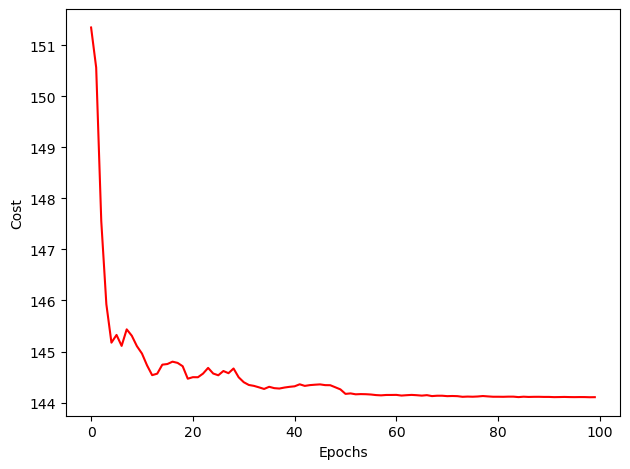

In [16]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_mini.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [17]:
%%time
##adjusting parameters for epochs 
params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=50, # iterations
              eta=0.01,  # learning rate
              alpha=0.1, # momentum calculation
              decrease_const=0.01, # decreasing eta
              minibatches=len(train_X)/64, # minibatch size
              shuffle=True,
              random_state=1)


nn_mini = TLPVectorizedMiniBatch(**params)
# print(test_y.isna().any())
# print(test_y.isna().sum())
nn_mini.fit(train_X, train_y, print_progress=50)

yhat = nn_mini.predict(test_X)

print('Accuracy:',accuracy_score(test_y,yhat))

Epoch: 50/50

Accuracy: 0.6558718371837183
CPU times: total: 27.2 s
Wall time: 10.5 s


### - [.5 points] Now (1) normalize the continuous numeric feature data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs.  

In [18]:
%%time
scaler = StandardScaler()

train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

params = dict(n_hidden=50, 
              C=0.1, 
              epochs=100, 
              eta=0.1,
              alpha=0.1,
              decrease_const=0.01,
              minibatches=len(train_X_scaled)/64,
              shuffle=True,
              random_state=1)

nn_mini = TLPVectorizedMiniBatch(**params)

nn_mini.fit(train_X_scaled, train_y, print_progress=50)
yhat = nn_mini.predict(test_X_scaled)

print('Accuracy:', accuracy_score(test_y, yhat))

C:\Users\Wasay\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
Epoch: 100/100

Accuracy: 0.9098597359735974
CPU times: total: 47.5 s
Wall time: 18 s


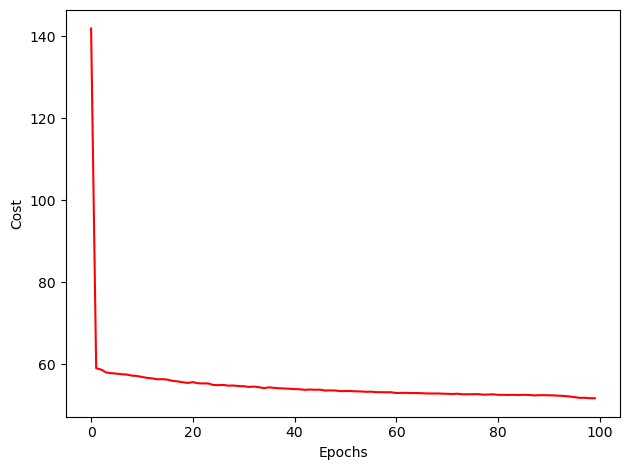

In [19]:
# take the mean of each minibatch epoch
cost_avgs = [np.mean(x) for x in nn_mini.cost_]

plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()


### - [.5 points] Now(1) normalize the continuous numeric feature data AND (2) one hot encode the categorical data. Use the example two-layer perceptron network from the class example and quantify performance using accuracy. Be sure that training converges by graphing the loss function versus the number of epochs. 

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Separate features and labels
train_X = balanced_train_df.drop(columns='ChildPoverty_class')
train_y = balanced_train_df['ChildPoverty_class']

# Identify categorical and numerical columns
categorical_cols = [cname for cname in train_X.columns if 
                    train_X[cname].dtype == "object"]
numerical_cols = [cname for cname in train_X.columns if 
                  train_X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data: standardization 
numerical_transformer = StandardScaler()

# Preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])


In [27]:
%%time
params = dict(n_hidden=50, 
              C=0.1, 
              epochs=100, 
              eta=0.1,
              alpha=0.1,
              decrease_const=0.01,
              minibatches=len(train_X)/64,
              shuffle=True,
              random_state=1)

nn_mini = TLPVectorizedMiniBatch(**params)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', nn_mini)
                          ])

# Preprocessing of training data, fit model 
pipeline.fit(train_X, train_y)

# Preprocessing of test data, get predictions
yhat = pipeline.predict(test_X)

# Evaluate the model
score = accuracy_score(test_y, yhat)
print('Accuracy:', score)

Accuracy: 0.9022277227722773
CPU times: total: 50.2 s
Wall time: 17.6 s


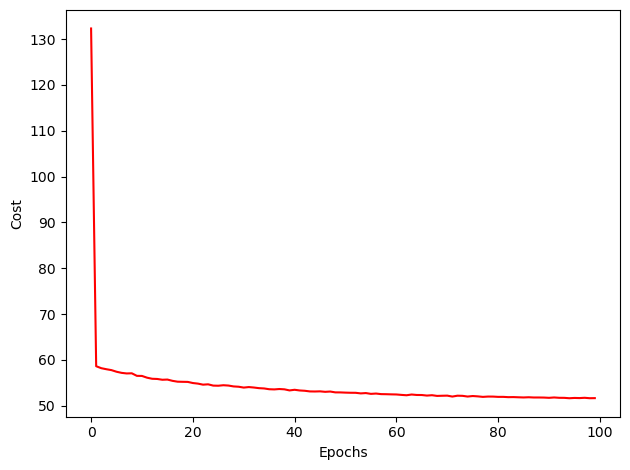

In [28]:
# Plotting the loss function
cost_avgs = [np.mean(x) for x in nn_mini.cost_]
plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

### - [1 points] Compare the performance of the three models you just trained. Are there any meaningful differences in performance? Explain, in your own words, why these models have (or do not have) different performances. Use one-hot encoding and normalization on the dataset for the remainder of this lab assignment.

Based on the runs above the accuracy can be found below:

No Transformation: 65.6% accuracy is essentially random guessing. Most likely, the scale differences between features messed with the neural network learning process. That's why preprocessing steps like normalization are so important.

Normalization: Jumping to 91.0%. Scaling the features to a standard range makes it easier for the optimization algorithm to find a good solution. 

Normalization + One-Hot Encoding: 90.2% is slightly lower than just normalization. One hot encoding may have increased the dimensionality of the data. We only had one categorical column in our case which was state, hence the increased dimensionality actually hurt our performance and probably made it harder for the model to generalize.

## Modeling (5 points total)
 - [1 points] Add support for a third layer in the multi-layer perceptron. Add support for saving (and plotting after training is completed) the average magnitude of the gradient for each layer, for each epoch (like we did in the flipped module for back propagation). For magnitude calculation, you are free to use either the average absolute values or the L1/L2 norm. Quantify the performance of the model and graph the magnitudes for each layer versus the number of epochs.

<font color="green">
    
### 3 layer NN Now with 1 new hidden layer
</font>

In [41]:
class ThreeLayerPerceptronVectorizedMiniBatch(TLPVectorizedMiniBatch):
    def __init__(self, n_hidden2=20, **kwds):        
        # Invoke the initialization method of the superclass
        super().__init__(**kwds)
        # Additional hidden layer neurons
        self.n_hidden2 = n_hidden2
        self.avg_grad_mag_W1 = []
        self.avg_grad_mag_W2 = []
        self.avg_grad_mag_W3 = []
    
    def _initialize_weights(self):
        W1, W2, b1, b2 = super()._initialize_weights()
        init_bound = np.sqrt(6. / (self.n_hidden + self.n_hidden2))
        W2 = np.random.uniform(-init_bound, init_bound, (self.n_hidden2, self.n_hidden))
        b2 = np.zeros((self.n_hidden2, 1))
        init_bound = np.sqrt(6. / (self.n_hidden2 + self.n_output_))
        W3 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden2))
        b3 = np.zeros((self.n_output_, 1))
        return W1, W2, W3, b1, b2, b3
    
    def _feedforward(self, X, W1, W2, W3, b1, b2, b3):
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4
    
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        # backpropagation for three-layer perceptron
        V3 = -2*(Y_enc-A4)*A4*(1-A4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)

        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))

        # regularization
        gradW1 += W1 * self.l2_C * 2
        gradW2 += W2 * self.l2_C * 2
        gradW3 += W3 * self.l2_C * 2

        return gradW1, gradW2, gradW3, gradb1, gradb2, gradb3
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred
    
    def fit(self, X, y, print_progress=0):
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.b1, self.b2, self.b3 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)

        self.cost_ = []
        for k in range(self.epochs):
            eta = self.eta ** (1 + self.decrease_const * k)
            eta = max(eta, self.eta / 1000)

            if print_progress > 0 and (k + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (k + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            avg_grads_W1, avg_grads_W2, avg_grads_W3 = [], [], []

            for idx in mini:
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)
                cost = self._cost(A4, Y_enc[:, idx], self.W1, self.W2)
                mini_cost.append(cost)

                gradW1, gradW2, gradW3, gradb1, gradb2, gradb3 = self._get_gradient(A1, A2, A3, A4, Z1, Z2, Z3, Y_enc[:, idx], self.W1, self.W2, self.W3)

                rho_W1, rho_W2, rho_W3 = eta * gradW1, eta * gradW2, eta * gradW3 
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))

                rho_W1_prev, rho_W2_prev, rho_W3_prev = rho_W1, rho_W2, rho_W3
                self.b1 -= eta * gradb1 
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3

                avg_grads_W1.append(np.mean(np.abs(gradW1)))
                avg_grads_W2.append(np.mean(np.abs(gradW2)))
                avg_grads_W3.append(np.mean(np.abs(gradW3)))

            self.cost_.append(mini_cost)
            self.avg_grad_mag_W1.append(np.mean(avg_grads_W1))
            self.avg_grad_mag_W2.append(np.mean(avg_grads_W2))
            self.avg_grad_mag_W3.append(np.mean(avg_grads_W3))
        return self


    def plot_gradients(self):
        plt.plot(self.avg_grad_mag_W1, label="Layer 1")
        plt.plot(self.avg_grad_mag_W2, label="Layer 2")
        plt.plot(self.avg_grad_mag_W3, label="Layer 3")
        plt.xlabel("Epochs")
        plt.ylabel("Average Gradient Magnitude")
        plt.title("Average Gradient Magnitudes vs. Epochs")
        plt.legend()
        plt.show()

In [42]:
%%time
params = dict(n_hidden=50, 
              C=0.1, 
              epochs=100, 
              eta=0.1,
              alpha=0.1,
              decrease_const=0.01,
              minibatches=len(train_X_scaled)/64,
              shuffle=True,
              random_state=1)

# Instantiate the three-layer perceptron with the parameters
nn_three_layer = ThreeLayerPerceptronVectorizedMiniBatch(**params)
# Fit the model
nn_three_layer.fit(train_X_scaled, train_y, print_progress=50)

# Predict on the test set
yhat = nn_three_layer.predict(test_X_scaled)

# Print the accuracy
print('Accuracy:', accuracy_score(test_y, yhat))


Epoch: 100/100

Accuracy: 0.9155665566556656
CPU times: total: 1min 17s
Wall time: 24.6 s


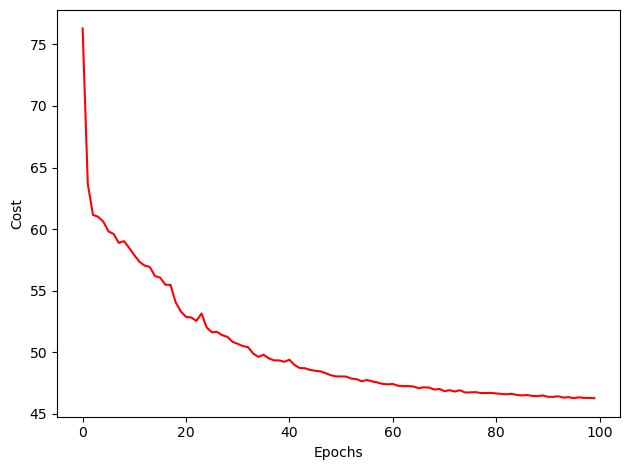

In [43]:
# Plotting the loss function
cost_avgs = [np.mean(x) for x in nn_three_layer.cost_]
plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

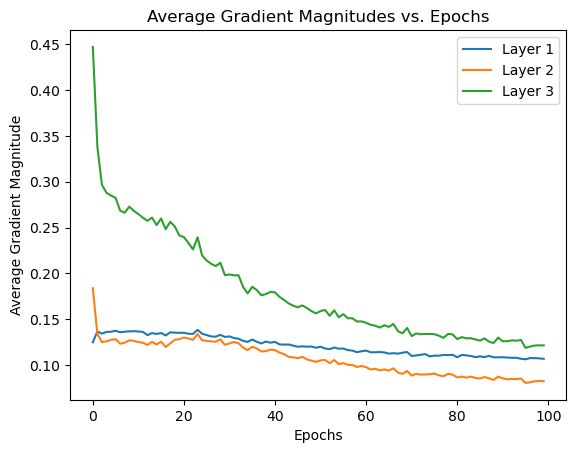

In [44]:
nn_three_layer.plot_gradients()

[1 points] Repeat the previous step, adding support for a fourth layer.

<font color="green">
    
### 4 layer NN Now with 2 hidden layers
</font>

In [70]:
class FourLayerPerceptronVectorizedMiniBatch(ThreeLayerPerceptronVectorizedMiniBatch):
    def __init__(self, n_hidden3=20, **kwds):
        super().__init__(**kwds)
        self.n_hidden3 = n_hidden3
        self.avg_grad_mag_W4 = []
    
    def _initialize_weights(self):
        W1, W2, W3, b1, b2, b3 = super()._initialize_weights()
        
        # Initialize the weights for the new fourth layer
        init_bound = np.sqrt(6. / (self.n_hidden2 + self.n_hidden3))
        W3 = np.random.uniform(-init_bound, init_bound, (self.n_hidden3, self.n_hidden2))
        b3 = np.zeros((self.n_hidden3, 1))

        # Adjust the third layer to connect to the fourth layer instead of the output
        init_bound = np.sqrt(6. / (self.n_hidden3 + self.n_output_))
        W4 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden3))
        b4 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, b1, b2, b3, b4
    
    def _feedforward(self, X, W1, W2, W3, W4, b1, b2, b3, b4):
        A1, Z1, A2, Z2, A3, Z3, A4 = super()._feedforward(X, W1, W2, W3, b1, b2, b3)
        
        # Add the feedforward step for the fourth layer
        Z4 = W4 @ A3 + b4
        A5 = self._sigmoid(Z4)
        
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5
    
    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        # Modify backpropagation to account for the fourth layer
        V4 = -2*(Y_enc-A5)*A5*(1-A5)
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)

        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))

        # Regularization
        gradW1 += W1 * self.l2_C * 2
        gradW2 += W2 * self.l2_C * 2
        gradW3 += W3 * self.l2_C * 2
        gradW4 += W4 * self.l2_C * 2

        return gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4

    def predict(self, X):
        _, _, _, _, _, _, _, _, A5 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4)
        y_pred = np.argmax(A5, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=0):
        # Assumes _initialize_weights is overridden and initializes W4, b4
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)  # Add previous weight step for the fourth layer

        self.cost_ = []
        for k in range(self.epochs):
            eta = self.eta ** (1 + self.decrease_const * k)
            eta = max(eta, self.eta / 1000)

            if print_progress > 0 and (k + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (k + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            avg_grads_W1, avg_grads_W2, avg_grads_W3, avg_grads_W4 = [], [], [], []  # Add avg gradient for the fourth layer

            for idx in mini:
                # Assume _feedforward is overridden to handle the fourth layer (A5 and Z4)
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4)
                cost = self._cost(A5, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4)  # Include W4 in cost calculation
                mini_cost.append(cost)

                # Assume _get_gradient is overridden to handle the fourth layer and returns gradients for W4 and b4
                gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4 = self._get_gradient(
                    A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4
                )

                rho_W1, rho_W2, rho_W3, rho_W4 = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))  # Update for the fourth layer

                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev = rho_W1, rho_W2, rho_W3, rho_W4  # Update previous weight step for the fourth layer
                self.b1 -= eta * gradb1 
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3
                self.b4 -= eta * gradb4  # Update bias for the fourth layer

                avg_grads_W1.append(np.mean(np.abs(gradW1)))
                avg_grads_W2.append(np.mean(np.abs(gradW2)))
                avg_grads_W3.append(np.mean(np.abs(gradW3)))
                avg_grads_W4.append(np.mean(np.abs(gradW4)))  # Collect average gradients for the fourth layer

            self.cost_.append(mini_cost)
            self.avg_grad_mag_W1.append(np.mean(avg_grads_W1))
            self.avg_grad_mag_W2.append(np.mean(avg_grads_W2))
            self.avg_grad_mag_W3.append(np.mean(avg_grads_W3))
            self.avg_grad_mag_W4.append(np.mean(avg_grads_W4))  # Store average gradients for the fourth layer
        return self

    def _cost(self, A5, Y_enc, W1, W2, W3, W4):
        # Convert Y_enc to the correct numerical type if necessary
        Y_enc = Y_enc.astype(float)

        epsilon = 1e-8  # A small value to avoid log(0)
        A5_clipped = np.clip(A5, epsilon, 1-epsilon)  # Ensure A5 does not have 0 or 1 values
        term1 = -Y_enc * np.log(A5_clipped)
        term2 = (1 - Y_enc) * np.log(1 - A5_clipped)
        cost = np.sum(term1 - term2)
    
    def plot_gradients(self):
        plt.plot(self.avg_grad_mag_W1, label="Layer 1")
        plt.plot(self.avg_grad_mag_W2, label="Layer 2")
        plt.plot(self.avg_grad_mag_W3, label="Layer 3")
        plt.plot(self.avg_grad_mag_W4, label="Layer 4")
        plt.xlabel("Epochs")
        plt.ylabel("Average Gradient Magnitude")
        plt.title("Average Gradient Magnitudes vs. Epochs")
        plt.legend()
        plt.show()


In [72]:
%%time
params = dict(n_hidden=50, 
              C=0.1, 
              epochs=100, 
              eta=0.1,
              alpha=0.1,
              decrease_const=0.01,
              minibatches=len(train_X_scaled)/64,
              shuffle=True,
              random_state=1)

# Instantiate the three-layer perceptron with the parameters
nn_4_layer = FourLayerPerceptronVectorizedMiniBatch(**params)
# Fit the model
nn_4_layer.fit(train_X_scaled, train_y, print_progress=50)

# Predict on the test set
yhat = nn_4_layer.predict(test_X_scaled)

# Print the accuracy
print('Accuracy:', accuracy_score(test_y, yhat))

Epoch: 100/100

Accuracy: 0.0037816281628162817
CPU times: total: 1min 5s
Wall time: 28.1 s


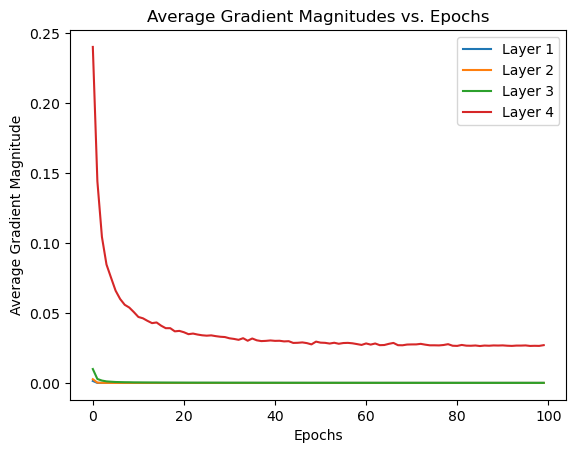

In [75]:
nn_4_layer.plot_gradients()

 - [1 points] Repeat the previous step, adding support for a fifth layer.
 
<font color="green">
    
### 5 layer NN Now with 3 hidden layers
</font>

In [98]:
class FiveLayerPerceptronVectorizedMiniBatch(FourLayerPerceptronVectorizedMiniBatch):
    def __init__(self, n_hidden4=20, **kwds):
        super().__init__(**kwds)
        self.n_hidden4 = n_hidden4
        self.avg_grad_mag_W5 = []
    
    def _initialize_weights(self):
        W1, W2, W3, W4, b1, b2, b3, b4 = super()._initialize_weights()
        
        # Initialize the weights for the new fifth layer
        init_bound = np.sqrt(6. / (self.n_hidden3 + self.n_hidden4))
        W4 = np.random.uniform(-init_bound, init_bound, (self.n_hidden4, self.n_hidden3))
        b4 = np.zeros((self.n_hidden4, 1))

        # Adjust the fourth layer to connect to the fifth layer instead of the output
        init_bound = np.sqrt(6. / (self.n_hidden4 + self.n_output_))
        W5 = np.random.uniform(-init_bound, init_bound, (self.n_output_, self.n_hidden4))
        b5 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5
    
    def _feedforward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = super()._feedforward(X, W1, W2, W3, W4, b1, b2, b3, b4)
        
        # Add the feedforward step for the fifth layer
        Z5 = W5 @ A4 + b5
        A6 = self._sigmoid(Z5)
        
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6
    
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        # Modify backpropagation to account for the fifth layer
        V5 = -2*(Y_enc-A6)*A6*(1-A6)
        V4 = A5*(1-A5)*(W5.T @ V5)
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)

        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb5 = np.sum(V5, axis=1).reshape((-1,1))
        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))

        # Regularization
        gradW1 += W1 * self.l2_C * 2
        gradW2 += W2 * self.l2_C * 2
        gradW3 += W3 * self.l2_C * 2
        gradW4 += W4 * self.l2_C * 2
        gradW5 += W5 * self.l2_C * 2  # Regularization for the fifth layer

        return gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5

    def fit(self, X, y, print_progress=0):
        # Assumes _initialize_weights is overridden and initializes W5, b5
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)  # Add previous weight step for the fourth layer
        rho_W5_prev = np.zeros(self.W5.shape)  # Add previous weight step for the fifth layer

        self.cost_ = []
        for k in range(self.epochs):
            eta = self.eta ** (1 + self.decrease_const * k)
            eta = max(eta, self.eta / 1000)

            if print_progress > 0 and (k + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (k + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            avg_grads_W1, avg_grads_W2, avg_grads_W3, avg_grads_W4, avg_grads_W5 = [], [], [], [], []  # Add avg gradient for the fifth layer

            for idx in mini:
                # Assume _feedforward is overridden to handle the fifth layer (A6 and Z5)
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)
                
                cost = self._cost(A6, Y_enc[:, idx])
                mini_cost.append(cost)

                # Assume _get_gradient is overridden to handle the fifth layer and returns gradients for W5 and b5
                gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(
                    A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4, self.W5
                )

                rho_W1, rho_W2, rho_W3, rho_W4, rho_W5 = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4, eta * gradW5
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))  # Update for the fourth layer
                self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev))  # Update for the fifth layer

                rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev, rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5  # Update previous weight step for the fifth layer
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                self.b3 -= eta * gradb3
                self.b4 -= eta * gradb4  # Update bias for the fourth layer
                self.b5 -= eta * gradb5  # Update bias for the fifth layer

                avg_grads_W1.append(np.mean(np.abs(gradW1)))
                avg_grads_W2.append(np.mean(np.abs(gradW2)))
                avg_grads_W3.append(np.mean(np.abs(gradW3)))
                avg_grads_W4.append(np.mean(np.abs(gradW4)))  # Collect average gradients for the fourth layer
                avg_grads_W5.append(np.mean(np.abs(gradW5)))  # Collect average gradients for the fifth layer

            self.cost_.append(mini_cost)
            self.avg_grad_mag_W1.append(np.mean(avg_grads_W1))
            self.avg_grad_mag_W2.append(np.mean(avg_grads_W2))
            self.avg_grad_mag_W3.append(np.mean(avg_grads_W3))
            self.avg_grad_mag_W4.append(np.mean(avg_grads_W4))  # Store average gradients for the fourth layer
            self.avg_grad_mag_W5.append(np.mean(avg_grads_W5))  # Store average gradients for the fifth layer

        return self
    def _cost(self, A6, Y_enc):
        # Convert Y_enc to the correct numerical type if necessary
        Y_enc = Y_enc.astype(float)

        epsilon = 1e-8  # A small value to avoid log(0)
        A6_clipped = np.clip(A6, epsilon, 1-epsilon)  # Ensure A6 does not have 0 or 1 values
        term1 = -Y_enc * np.log(A6_clipped)
        term2 = (1 - Y_enc) * np.log(1 - A6_clipped)
        cost = np.sum(term1 - term2)

        return cost


    def predict(self, X):
        _, _, _, _, _, _, _, _, _, _, A6 = self._feedforward(X, self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)
        y_pred = np.argmax(A6, axis=0) 
        return y_pred




    def plot_gradients(self):
        plt.plot(self.avg_grad_mag_W1, label="Layer 1")
        plt.plot(self.avg_grad_mag_W2, label="Layer 2")
        plt.plot(self.avg_grad_mag_W3, label="Layer 3")
        plt.plot(self.avg_grad_mag_W4, label="Layer 4")
        plt.plot(self.avg_grad_mag_W5, label="Layer 5")  # Add plot for the fifth layer
        plt.xlabel("Epochs")
        plt.ylabel("Average Gradient Magnitude")
        plt.title("Average Gradient Magnitudes vs. Epochs")
        plt.legend()
        plt.show()


In [99]:
%%time
params = dict(n_hidden=50, 
              C=0.1, 
              epochs=100, 
              eta=0.1,
              alpha=0.1,
              decrease_const=0.01,
              minibatches=len(train_X_scaled)/64,
              shuffle=True,
              random_state=1)

nn_5_layer = FiveLayerPerceptronVectorizedMiniBatch(**params)
# Fit the model
nn_5_layer.fit(train_X_scaled, train_y, print_progress=50)

# Predict on the test set
yhat = nn_5_layer.predict(test_X_scaled)

# Print the accuracy
print('Accuracy:', accuracy_score(test_y, yhat))

Epoch: 100/100

Accuracy: 0.08683993399339934
CPU times: total: 1min 34s
Wall time: 33.5 s


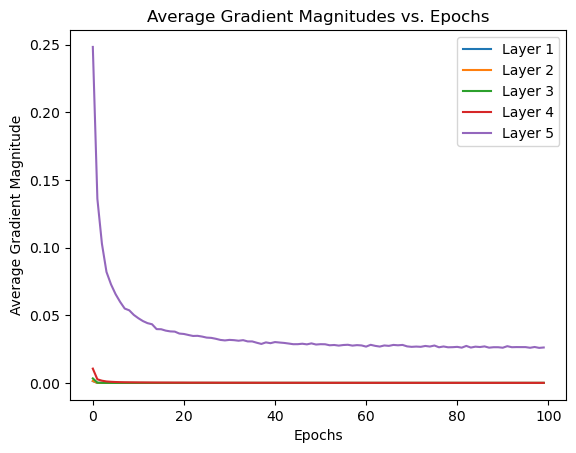

In [100]:
nn_5_layer.plot_gradients()

# [2 points] Implement an adaptive learning technique that was discussed in lecture and use it on the five layer network (choose either RMSProp or AdaDelta). Discuss which adaptive method you chose. Compare the performance of your five layer model with and without the adaptive learning strategy. Do not use AdaM for the adaptive learning technique as it is part of the exceptional work.

In [134]:
import numpy as np
import sys

class FiveLayerPerceptronVectorizedMiniBatchAdaDelta(FiveLayerPerceptronVectorizedMiniBatch):
    def __init__(self, n_hidden4=20, rho=0.95, epsilon=1e-6, **kwds):
        super().__init__(n_hidden4=n_hidden4, **kwds)
        self.rho = rho  # Decay rate for the moving average of the squared gradient
        self.epsilon = epsilon  # Small constant to maintain numerical stability

    def fit(self, X, y, print_progress=0):
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        # Initialization for AdaDelta
        E_grad_squared_W = [np.zeros_like(w) for w in [self.W1, self.W2, self.W3, self.W4, self.W5]]
        E_grad_squared_b = [np.zeros_like(b) for b in [self.b1, self.b2, self.b3, self.b4, self.b5]]
        E_delta_x_squared_W = [np.zeros_like(w) for w in [self.W1, self.W2, self.W3, self.W4, self.W5]]
        E_delta_x_squared_b = [np.zeros_like(b) for b in [self.b1, self.b2, self.b3, self.b4, self.b5]]

        self.cost_ = []
        for k in range(self.epochs):

            if print_progress > 0 and (k + 1) % print_progress == 0:
                sys.stderr.write('\rEpoch: %d/%d' % (k + 1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                ridx = np.random.permutation(y_data.shape[0])
                X_data, Y_enc = X_data[ridx], Y_enc[:, ridx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []

            for idx in mini:
                A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feedforward(
                    X_data[idx], self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)

                cost = self._cost(A6, Y_enc[:, idx])
                mini_cost.append(cost)

                # Get the gradient
                grads = self._get_gradient(
                    A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc[:, idx], self.W1, self.W2, self.W3, self.W4, self.W5)

                # Update weights and biases using AdaDelta
                for i, (grad, E_g2, E_dx2, W) in enumerate(zip(grads[:5], E_grad_squared_W, E_delta_x_squared_W, [self.W1, self.W2, self.W3, self.W4, self.W5])):
                    E_g2[:] = self.rho * E_g2 + (1. - self.rho) * grad**2
                    delta_x = -np.sqrt((E_dx2 + self.epsilon) / (E_g2 + self.epsilon)) * grad
                    E_dx2[:] = self.rho * E_dx2 + (1. - self.rho) * delta_x**2
                    W += delta_x

                # Update biases using AdaDelta
                for i, (grad, E_g2, E_dx2, b) in enumerate(zip(grads[5:], E_grad_squared_b, E_delta_x_squared_b, [self.b1, self.b2, self.b3, self.b4, self.b5])):
                    E_g2[:] = self.rho * E_g2 + (1. - self.rho) * grad**2
                    delta_x = -np.sqrt((E_dx2 + self.epsilon) / (E_g2 + self.epsilon)) * grad
                    E_dx2[:] = self.rho * E_dx2 + (1. - self.rho) * delta_x**2
                    b += delta_x

            self.cost_.append(mini_cost)

        return self
    


<font color="green">

### The following eta = 0.1 gave us Accuracy: 25.35%

</font>

In [170]:
%%time
params = dict(n_hidden=50, 
              C=0.1, 
              epochs=100, 
              eta=0.1,
              alpha=0.1,
              decrease_const=0.01,
              minibatches=len(train_X)/64,
              shuffle=True,
              random_state=1)

nn_mini_ada1 = FiveLayerPerceptronVectorizedMiniBatchAdaDelta(**params)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', nn_mini_B)
                          ])

# Preprocessing of training data, fit model 
pipeline.fit(train_X, train_y)

# Preprocessing of test data, get predictions
yhat = pipeline.predict(test_X)

# Evaluate the model
score = accuracy_score(test_y, yhat)
print('Accuracy:', score)

Accuracy: 0.25350660066006603
CPU times: total: 2min
Wall time: 42.2 s


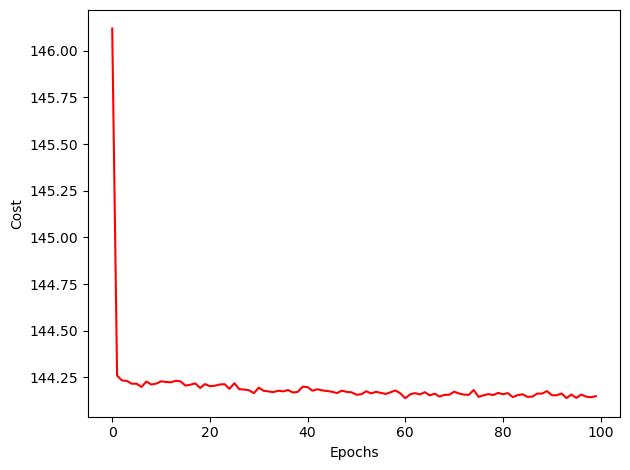

In [173]:
# Plotting the loss function
cost_avgs = [np.mean(x) for x in nn_mini_ada1.cost_]
plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()


<font color="green">

### The following eta = 0.01 gave us Accuracy: 25.35

</font>

In [178]:
%%time
params = dict(n_hidden=50, 
              C=0.1, 
              epochs=100, 
              eta=0.01,
              alpha=0.1,
              decrease_const=0.01,
              minibatches=len(train_X)/64,
              shuffle=True,
              random_state=1)

nn_mini_ada2 = FiveLayerPerceptronVectorizedMiniBatchAdaDelta(**params)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', nn_mini_b)
                          ])

# Preprocessing of training data, fit model 
pipeline.fit(train_X, train_y)

# Preprocessing of test data, get predictions
yhat = pipeline.predict(test_X)

# Evaluate the model
score = accuracy_score(test_y, yhat)
print('Accuracy:', score)

Accuracy: 0.25350660066006603
CPU times: total: 1min 56s
Wall time: 42.3 s


In [142]:
%%time
params = dict(n_hidden=50, 
              C=0.1, 
              epochs=10, 
              eta=0.0095,
              alpha=0.1,
              decrease_const=0.01,
              minibatches=len(train_X)/64,
              shuffle=True,
              random_state=1)

nn_mini_ada = FiveLayerPerceptronVectorizedMiniBatchAdaDelta(**params)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', nn_mini)
                          ])

# Preprocessing of training data, fit model 
pipeline.fit(train_X, train_y)

# Preprocessing of test data, get predictions
yhat = pipeline.predict(test_X)

# Evaluate the model
score = accuracy_score(test_y, yhat)
print('Accuracy:', score)

Accuracy: 0.0037816281628162817
CPU times: total: 12.6 s
Wall time: 4.13 s


## Exceptional Work (1 points total)
Implement adaptive momentum (AdaM) in the five layer neural network and quantify the performance compared to other methods.  